In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv('BigMart_sales.csv')

In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
1.

In [6]:
df.shape

(8523, 12)

#### column description 
- item identifier :- A key column to identify each column
- item-weaight:- The weight of the item content
- item-fat-content:- Fact content in the item
- Item_Visibility:- percentage of total display area of all products in a store allocated to the particular product
- Item_Type : the category to which the product belongs
- Item_MRP	:-Maximum Retail Price (listed price) of the products
- Outlet_Identifier	:-A key column to identify each outlet location
- outlet_establish_year:-year when the outlet was established
- Outlet_Size:-the size of the store in terms of ground area covered
- Outlet_Location_Type:-the type of city in which the store is located
- Outlet_Type:-specifies whether the outlet is just a grocery store or some sort of supermarket
- Item_Outlet_Sales:-(target variable) sales of the product in the particular store

In [7]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

#### Probleam statement:
- Analyze the data and understand the factor impacting the sales in each outlet
-identify

## Import and Inspect the Data
- Check for missing values and their distribution across variables, as missing data can significantly
affect the quality and reliability of your analysis.
- Identify the data types and formats for each variable, as this information is essential for subsequent
data manipulation and analysis steps.
- Look for any obvious errors or inconsistencies in the data, such as invalid values, mismatched units,
or outliers, which could indicate data quality issues.

In [8]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

missing value are found in item_waeight column(1463 as count and 17%) and outlet size (2410 approx 28%)
missing data can significantly affect the quality and reliablity of our anlyis which needs to handle during the process                                                                                    
                                                                                       

In [9]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## 1- The categorical are :- 
 -Item_Fat_Content -Item_Type -Outlet_Size  -Outlet_Location_Type -Outlet_Type 
## 2- Numerical columns are :-
-Item_Weight   -Item_Visibility   -Item_MRP -Outlet_Establishment_Year -Item_Outlet_Sales

In [10]:
categotical_columns=df.select_dtypes(include="object").columns 
numerical_columns=df.select_dtypes(include=['int64','float64']).columns

In [12]:
categotical_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [13]:
numerical_columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

 - check for duplicate records ,inconsistance data

In [11]:
df.duplicated().sum() ## there are no duplicateds found

0

- check unique value frequncy every columns in categorical value

In [12]:
for cat  in categotical_columns :
    print(f' unique values and their counts in {cat}')
    print(df[cat].value_counts())
    print("*************************")
  
    

 unique values and their counts in Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64
*************************
 unique values and their counts in Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
*************************
 unique values and their counts in Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64

In [18]:
### data in columns fat content has to be fixed :- convert lf and low fat to Low Fat ,convert reg to  Regular

In [13]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'reg':'Regular', 'low fat' : 'Low Fat','LF': 'Low Fat'})

In [14]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [15]:
## combaine all supermarket types under one supermarket label
df['Outlet_Type']=df['Outlet_Type'].replace({"Supermarket Type1": "supermarket" ,"Supermarket Type3" : "supermarket" ,  "Supermarket Type2" :"supermarket"})

In [16]:
df['Outlet_Type'].value_counts()

Outlet_Type
supermarket      7440
Grocery Store    1083
Name: count, dtype: int64

In [17]:
for num in numerical_columns :
    print(num)
    print(df[num].unique())


Item_Weight
[ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6
 14.    16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2
 14.5   13.1   12.3   11.1   11.3    5.75  11.35   6.525 10.3    5.78
 11.85  18.75   5.26  16.1    9.5   13.8   14.65   6.67   6.11  17.2
  6.32   4.88   5.425 14.1    7.55  17.25  12.    10.1    7.785 13.15
  8.5    7.63   9.285  7.975 15.7    8.985 20.35   6.59  19.85   6.26
 18.2    8.69

In [18]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [30]:
df[df['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,supermarket,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,supermarket,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,supermarket,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,supermarket,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,supermarket,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,supermarket,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


## 🧹 Step 3: Handle Missing Values

In [19]:
# Fill missing Item_Weight with mean
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

# Fill missing Outlet_Size with most frequent value
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29492\96085421.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29492\96085421.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


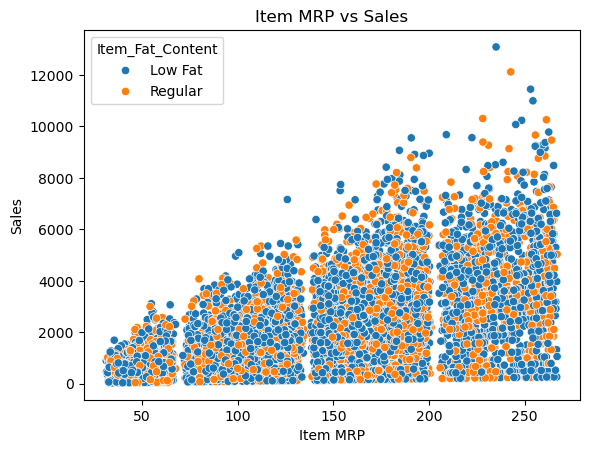

In [21]:
sns.scatterplot(data=df, x='Item_MRP', y='Item_Outlet_Sales', hue='Item_Fat_Content')
plt.title("Item MRP vs Sales")
plt.xlabel("Item MRP")
plt.ylabel("Sales")
plt.show()


Step 4:- perform univariate analyis with distribution plots /count ploats analyise  is the simple form of data analyis 

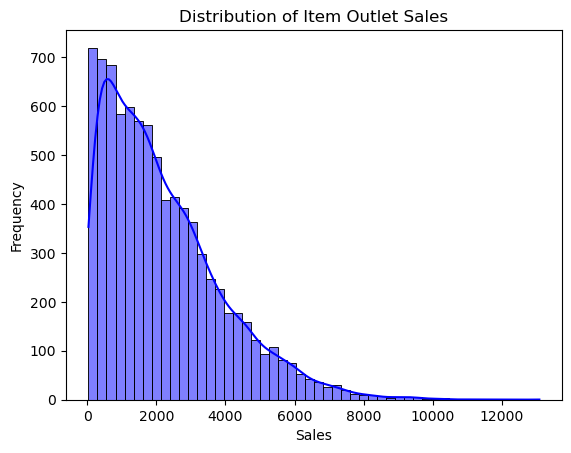

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Item_Outlet_Sales'], bins=50, kde=True, color='blue')
plt.title("Distribution of Item Outlet Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()


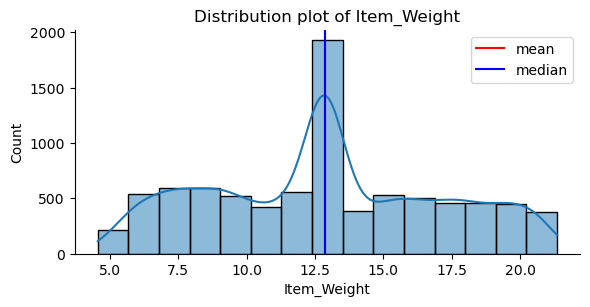

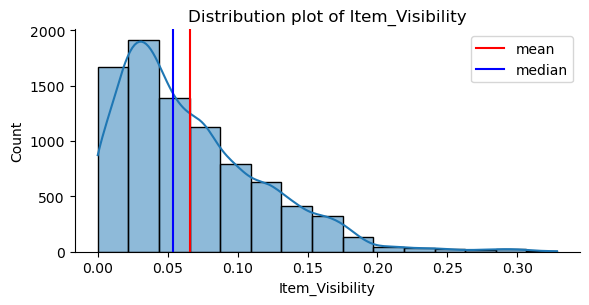

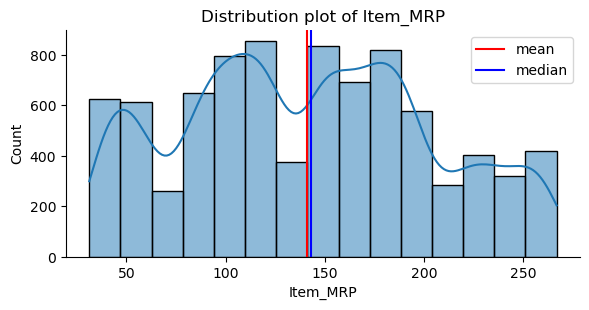

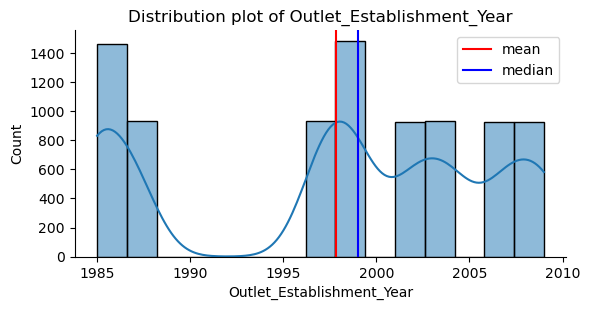

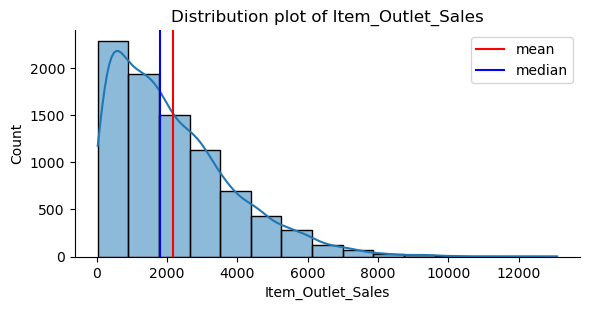

In [32]:
for num in numerical_columns:
    sns.displot(data=df, x=num, bins=15, height=3, aspect=2, kde=True)
    plt.axvline(df[num].mean(), label='mean', c='r')
    plt.axvline(df[num].median(), label='median', c='b')
    plt.title(f'Distribution plot of {num}')
    plt.legend()
    plt.show()


- Item outlet sales and Itemnvisibility is positively skewed

- Not a clear pattern is visible in item_weight and item_mrp, the data seems symmetrical in item_weight

- Majority of the item _weight are around 12 units

- MRP values seems to follows approx.uniform distribution

In [ ]:
##create count ploat for all categories columns including

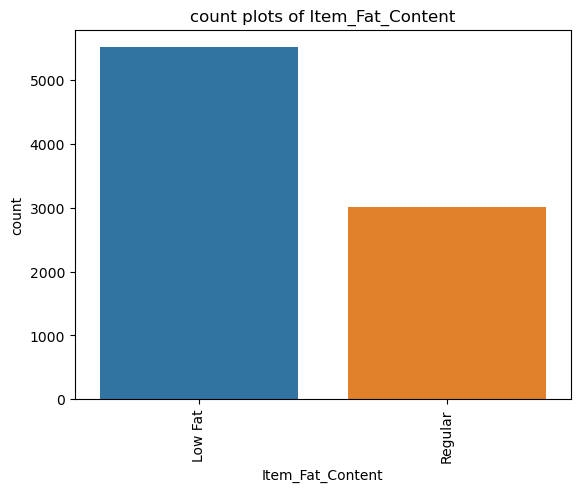

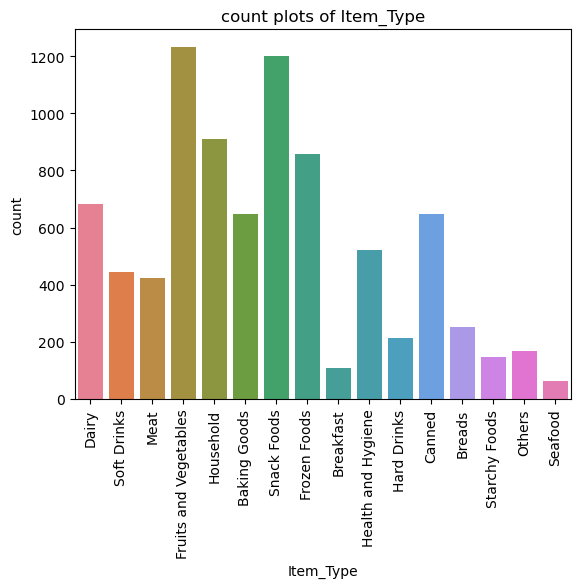

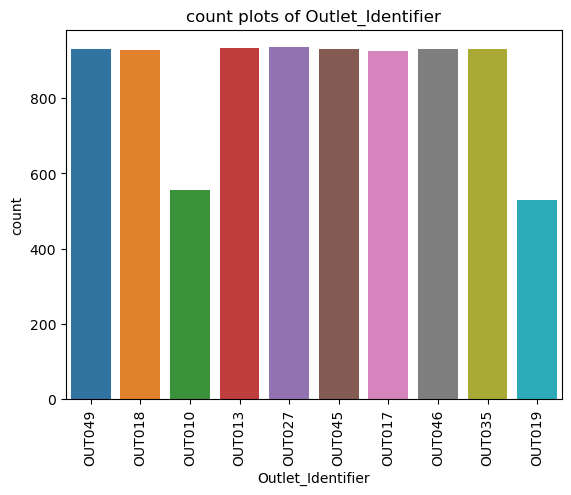

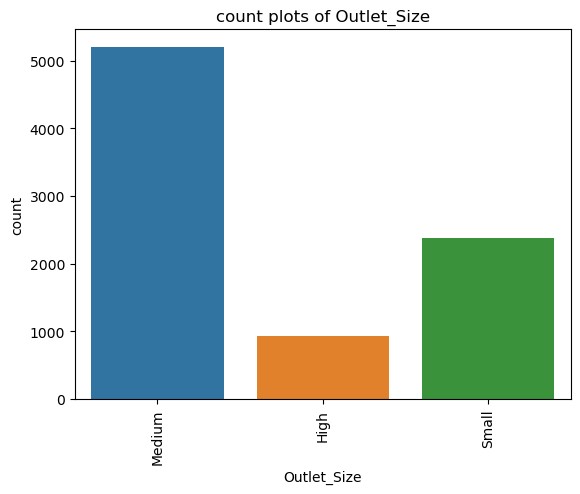

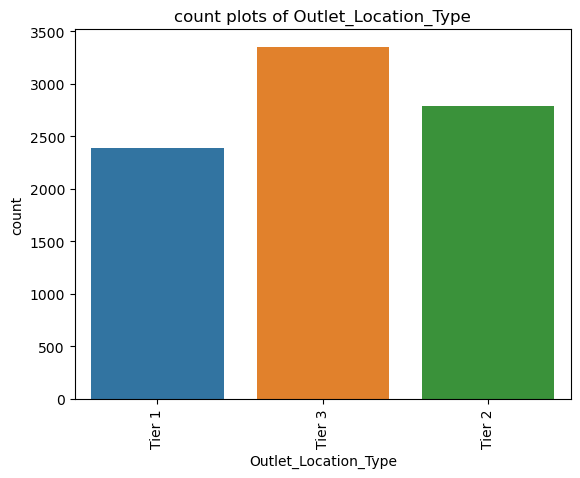

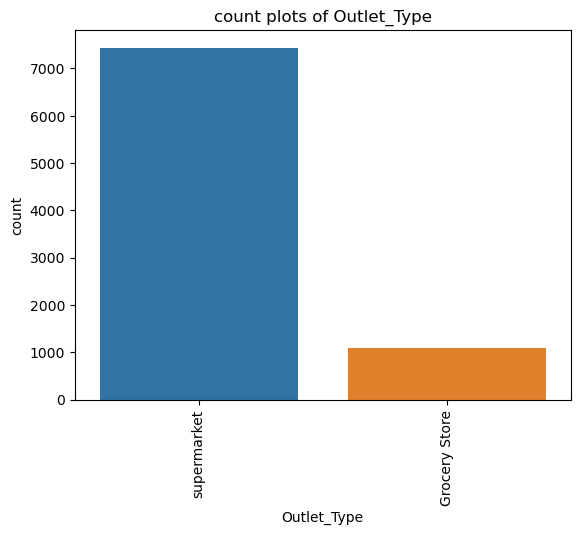

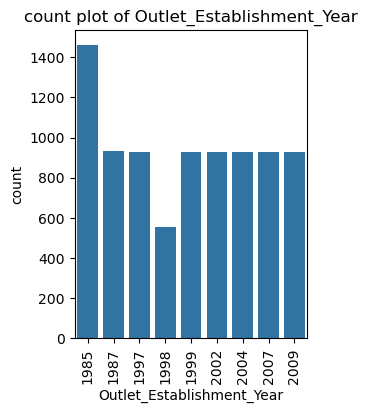

In [39]:
for cat in categotical_columns:
 if cat !='Item_Identifier':
    sns.countplot(data=df,x=cat,hue=cat)
    plt.title(f'count plots of {cat}')
    plt.xticks(rotation=90)
    plt.show()


plt.figure(figsize =(3,4))
sns.countplot(data=df,x="Outlet_Establishment_Year")
plt.title("count plot of Outlet_Establishment_Year")
plt.xticks(rotation=90)
plt.show()

- low fat items are more in  count as compared to regular
  
- fruits and vegetables and snacks are fast selling items compared to other item types
  
- highest number od outlets were established in 1985

- supermarket typ is far higheris count as compared to groceries

- tier 3 has more number of dataponts

- medium oulet size is more frequet as compared to small and large sizes
